# First Part

# Import Libraries


In [74]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import seaborn as sns

from sklearn.tree import DecisionTreeRegressor, plot_tree, export_text
from sklearn.metrics import mean_absolute_error

# Load Dataset

In [10]:
df = pd.read_csv('wine-missing.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,unknown,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,unknown,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,unknown,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Describe Dataset Features

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


# Histogram of Features

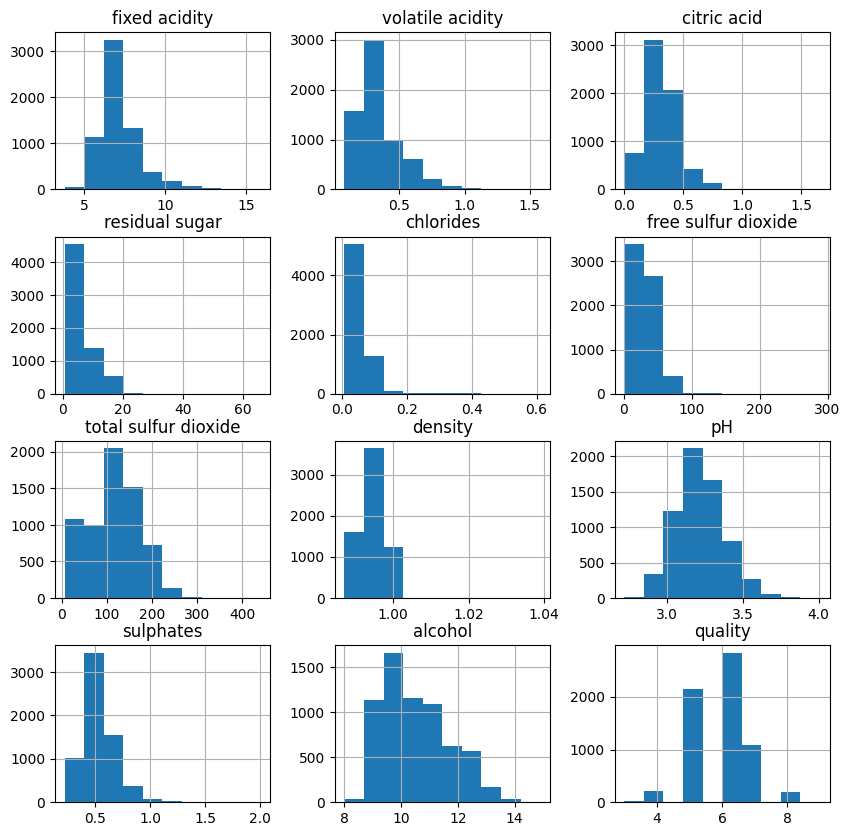

In [12]:
df.hist(figsize=(10,10))
plt.show()

# Bar Plot for Target

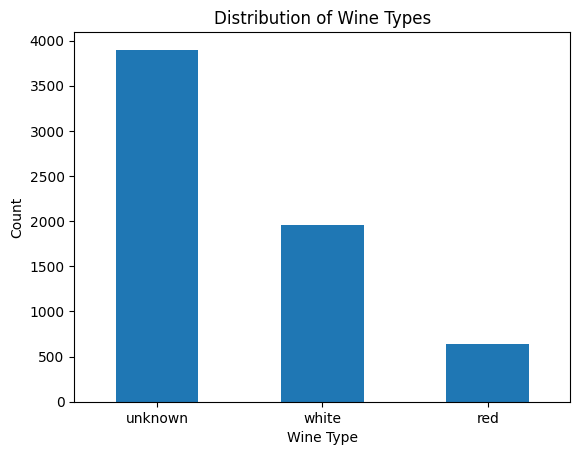

In [13]:
df['type'].value_counts().plot(kind='bar')
plt.title('Distribution of Wine Types')
plt.xlabel('Wine Type')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Type Mapping and Conversion to NumPy Arrays

In [14]:
type_mapping = {'white': 0, 'red': 1, 'unknown': 2}
df['type'] = df['type'].map(type_mapping)


x = df.drop(columns=['type'])
y = df['type']

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)
print("First 5 rows of x:\n", x[:5])
print("First 5 values of y:\n", y[:5])

Shape of x: (6497, 12)
Shape of y: (6497,)
First 5 rows of x:
    fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0

# Create 2 different Datasets

In [15]:
known_type_indices = (y == 0) | (y == 1)

# Create x_known and y_known datasets
x_known = x[known_type_indices]
y_known = y[known_type_indices]

# Identify indices for unknown types (2 for unknown)
unknown_type_indices = (y == 2)

# Create x_unknown dataset
x_unknown = x[unknown_type_indices]

print("Shape of x_known:", x_known.shape)
print("Shape of y_known:", y_known.shape)
print("Shape of x_unknown:", x_unknown.shape)

print("First 5 rows of x_known:\n", x_known[:5])
print("First 5 values of y_known:\n", y_known[:5])
print("First 5 rows of x_unknown:\n", x_unknown[:5])

Shape of x_known: (2599, 12)
Shape of y_known: (2599,)
Shape of x_unknown: (3898, 12)
First 5 rows of x_known:
     fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0             7.0              0.27         0.36           20.70      0.045   
2             8.1              0.28         0.40            6.90      0.050   
8             6.3              0.30         0.34            1.60      0.049   
9             8.1              0.22         0.43            1.50      0.044   
14            8.3              0.42         0.62           19.25      0.040   

    free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                  45.0                 170.0   1.0010  3.00       0.45   
2                  30.0                  97.0   0.9951  3.26       0.44   
8                  14.0                 132.0   0.9940  3.30       0.49   
9                  28.0                 129.0   0.9938  3.22       0.45   
14                 41.0               

# Split Dataset with known Y

In [17]:
# Split the x_known and y_known datasets into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    x_known, y_known, test_size=0.3, random_state=42, stratify=y_known
)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (1819, 12)
Shape of X_test: (780, 12)
Shape of y_train: (1819,)
Shape of y_test: (780,)


# Random Forest

In [20]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)


y_train_pred = rf_classifier.predict(X_train)
y_test_pred = rf_classifier.predict(X_test)

print("--- Training Set Metrics ---")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred, average='weighted'):.4f}")
print("\n--- Test Set Metrics ---")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred, average='weighted'):.4f}")


print("\n--- Class Distribution in y_known ---")
class_counts = y_known.value_counts()
print(class_counts)
print(f"Class 0 (White) percentage: {class_counts[0] / len(y_known) * 100:.2f}%")
print(f"Class 1 (Red) percentage: {class_counts[1] / len(y_known) * 100:.2f}%")

--- Training Set Metrics ---
Accuracy: 0.9995
F1-Score: 0.9995
Precision: 0.9995
Recall: 0.9995

--- Test Set Metrics ---
Accuracy: 0.9987
F1-Score: 0.9987
Precision: 0.9987
Recall: 0.9987

--- Class Distribution in y_known ---
type
0    1959
1     640
Name: count, dtype: int64
Class 0 (White) percentage: 75.38%
Class 1 (Red) percentage: 24.62%


**Accuracy vs F1**

Για να προσδιορίσουμε ποια μετρική είναι πιο αντιπροσωπευτική, πρέπει να λάβουμε υπόψη την κατανομή των κλάσεων της μεταβλητής στόχου (y_known).

Με βάση την κατανομή των κλάσεων:

Εάν οι κλάσεις είναι ισορροπημένες, τότε η Ακρίβεια είναι γενικά μια καλή και απλή μετρική. Μετράει το ποσοστό των σωστά ταξινομημένων περιπτώσεων από το σύνολο των περιπτώσεων.
Εάν οι κλάσεις είναι ανισορροπημένες, δηλαδή μια κλάση υπερισχύει σημαντικά της αλλης, τότε το F1-score είναι συνήθως πιο αντιπροσωπευτικό. Το F1-score είναι ο αρμονικός μέσος της ακρίβειας (precision) και της ανάκλησης (recall). Ισορροπεί αυτές τις δύο μετρικές, οι οποίες είναι κρίσιμες όταν ασχολούμαστε με ανισόρροπα σύνολα δεδομένων:
Το Precision μας δείχνει πόσες από τις θετικά προβλεφθείσες περιπτώσεις ήταν πραγματικά θετικές.
Το Recall μας δείχνει πόσες από τις πραγματικές θετικές περιπτώσεις εντοπίστηκαν σωστά.
Σε ένα ανισόρροπο σύνολο δεδομένων, ένα μοντέλο μπορεί να επιτύχει υψηλή ακρίβεια προβλέποντας απλώς την πλειοψηφούσα κλάση τις περισσότερες φορές. Ωστόσο, αυτό μπορεί να σημαίνει ότι αποδίδει πολύ άσχημα στην μειοψηφούσα κλάση. Το F1-score, λαμβάνοντας υπόψη τόσο το precision όσο και το recall, δίνει μια πιο ειλικρινή αξιολόγηση της απόδοσης ενός μοντέλου, ειδικά για τη μειοψηφούσα κλάση, καθιστώντας το καλύτερη επιλογή για ανισόρροπα σύνολα δεδομένων.

Επομένως εφοσον βλέπουμε οτι η κλάση white είναι σημαντικά μεγαλύτερη απο την red πιο αντιπροσωπευτικο για αυτό το dataset ειναι το f1 score.

## Re-train Random Forest Classifier with `class_weight='balanced'`

In [21]:
rf_classifier_balanced = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier_balanced.fit(X_train, y_train)

y_train_pred_balanced = rf_classifier_balanced.predict(X_train)
y_test_pred_balanced = rf_classifier_balanced.predict(X_test)

print("--- Training Set Metrics (with class_weight='balanced') ---")
print(f"Accuracy: {accuracy_score(y_train, y_train_pred_balanced):.4f}")
print(f"F1-Score: {f1_score(y_train, y_train_pred_balanced, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_train, y_train_pred_balanced, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_train, y_train_pred_balanced, average='weighted'):.4f}")
print("\n--- Test Set Metrics (with class_weight='balanced') ---")
print(f"Accuracy: {accuracy_score(y_test, y_test_pred_balanced):.4f}")
print(f"F1-Score: {f1_score(y_test, y_test_pred_balanced, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test, y_test_pred_balanced, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test, y_test_pred_balanced, average='weighted'):.4f}")

print("\n--- Class Distribution in y_known ---")
class_counts = y_known.value_counts()
print(class_counts)
print(f"Class 0 (White) percentage: {class_counts[0] / len(y_known) * 100:.2f}%")
print(f"Class 1 (Red) percentage: {class_counts[1] / len(y_known) * 100:.2f}%")

--- Training Set Metrics (with class_weight='balanced') ---
Accuracy: 0.9995
F1-Score: 0.9995
Precision: 0.9995
Recall: 0.9995

--- Test Set Metrics (with class_weight='balanced') ---
Accuracy: 0.9949
F1-Score: 0.9949
Precision: 0.9949
Recall: 0.9949

--- Class Distribution in y_known ---
type
0    1959
1     640
Name: count, dtype: int64
Class 0 (White) percentage: 75.38%
Class 1 (Red) percentage: 24.62%


### Επεξήγηση της παραμέτρου `class_weight='balanced'`

Η παράμετρος `class_weight` στον ταξινομητή `RandomForestClassifier` της scikit-learn χρησιμοποιείται για την αντιμετώπιση προβλημάτων με **ανισόρροπα σύνολα δεδομένων** (imbalanced datasets), όπου οι κλάσεις δεν έχουν ίσο αριθμό δειγμάτων.

Όταν η τιμή της παραμέτρου ορίζεται σε `'balanced'`, ο classifier προσαρμόζει αυτόματα τα βάρη των κλάσεων αντιστρόφως ανάλογα με τη συχνότητα εμφάνισής τους στα δεδομένα εισόδου. Πιο συγκεκριμένα:

*   **Μεγαλύτερο βάρος στις μειοψηφούσες κλάσεις:** Οι κλάσεις που έχουν λιγότερα δείγματα λαμβάνουν μεγαλύτερο βάρος. Αυτό σημαίνει ότι ο αλγόριθμος θα δώσει μεγαλύτερη σημασία στα λάθη ταξινόμησης που αφορούν τις μειοψηφούσες κλάσεις κατά τη διάρκεια της εκπαίδευσης.
*   **Μικρότερο βάρος στις πλειοψηφούσες κλάσεις:** Αντίστοιχα, οι κλάσεις με περισσότερα δείγματα λαμβάνουν μικρότερο βάρος.

Ο **στόχος** αυτής της προσαρμογής είναι να αποτρέψει τον classifier από το να γίνει προκατειλημμένος προς την πλειοψηφούσα κλάση και να βελτιώσει την απόδοση στις μειοψηφούσες κλάσεις. Ενώ η συνολική ακρίβεια (accuracy) μπορεί να μειωθεί ελαφρώς, μετρικές όπως το F1-score, η ανάκληση (recall) και η ακρίβεια (precision) για τις μειοψηφούσες κλάσεις αναμένεται να βελτιωθούν, παρέχοντας μια πιο ρεαλιστική εικόνα της ικανότητας του μοντέλου να ταξινομεί σωστά όλες τις κλάσεις.

## Calculate Class Probabilities for `x_unknown`


In [22]:
# Calculate the probabilities for each class for examples in x_unknown
y_unknown_proba = rf_classifier_balanced.predict_proba(x_unknown)

print("Shape of y_unknown_proba:", y_unknown_proba.shape)
print("First 5 rows of y_unknown_proba:\n", y_unknown_proba[:])

Shape of y_unknown_proba: (3898, 2)
First 5 rows of y_unknown_proba:
 [[1.   0.  ]
 [1.   0.  ]
 [1.   0.  ]
 ...
 [0.01 0.99]
 [0.01 0.99]
 [0.01 0.99]]


## Assign labels to `x_unknown` based on probability thresholds


In [24]:
# Initialize y_unknown_pred with a default value for unclassified samples (-1, as 0 and 1 are used for classes)
y_unknown_pred = np.full(len(x_unknown), -1)  # Using -1 to indicate unclassified

proba_white = y_unknown_proba[:, 0]
proba_red = y_unknown_proba[:, 1]

red_condition = proba_red > 0.65
y_unknown_pred[red_condition] = 1

white_condition = proba_red < 0.35
y_unknown_pred[white_condition] = 0

print("Shape of y_unknown_pred:", y_unknown_pred.shape)
print("First 10 values of y_unknown_pred:\n", y_unknown_pred[:10])
print("\nValue counts for y_unknown_pred:")
print(pd.Series(y_unknown_pred).value_counts())


Shape of y_unknown_pred: (3898,)
First 10 values of y_unknown_pred:
 [0 0 0 0 0 0 0 0 0 0]

Value counts for y_unknown_pred:
 0    2939
 1     908
-1      51
Name: count, dtype: int64


## Combine datasets, Retrain Random Forest, and Evaluate Accuracy

In [31]:
classified_indices = (y_unknown_pred != -1)
x_unknown_classified = x_unknown[classified_indices]
y_unknown_classified_labels = y_unknown_pred[classified_indices]


y_unknown_classified_series = pd.Series(y_unknown_classified_labels, index=x_unknown_classified.index)


X_train_combined = pd.concat([X_train, x_unknown_classified], axis=0)
y_train_combined = pd.concat([y_train, y_unknown_classified_series], axis=0)

print("Shape of X_train_combined:", X_train_combined.shape)
print("Shape of y_train_combined:", y_train_combined.shape)


rf_classifier_final = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_classifier_final.fit(X_train_combined, y_train_combined)

y_train_pred = rf_classifier_final.predict(X_train)
y_test_pred_final = rf_classifier_final.predict(X_test)

print("\n--- Final Model Metrics ---")
print(f"Accuracy on original training set: {accuracy_score(y_train, y_train_pred):.4f}")
print(f"Accuracy on original test set: {accuracy_score(y_test, y_test_pred_final):.4f}")


Shape of X_train_combined: (5666, 12)
Shape of y_train_combined: (5666,)

--- Final Model Metrics ---
Accuracy on original training set: 0.9995
Accuracy on original test set: 0.9949


In [82]:
unlabeled_data = x_unknown[y_unknown_pred == -1]
iteration_metrics = []
iteration = 0

print(f"Initial number of unlabeled samples: {len(unlabeled_data)}")
print(f"Iteration metrics list initialized: {iteration_metrics}")
print(f"Iteration counter initialized to: {iteration}")

Initial number of unlabeled samples: 51
Iteration metrics list initialized: []
Iteration counter initialized to: 0


In [83]:
max_iterations = 10 # Set a maximum number of iterations to prevent infinite loops

while len(unlabeled_data) > 0 and iteration < max_iterations:
    iteration += 1
    print(f"\n--- Iteration {iteration} ---")
    print(f"Number of unlabeled samples at start: {len(unlabeled_data)}")

    unlabeled_proba = rf_classifier_final.predict_proba(unlabeled_data)

    proba_white = unlabeled_proba[:, 0]
    proba_red = unlabeled_proba[:, 1]

    confident_white_mask = proba_red < 0.35
    confident_red_mask = proba_red > 0.65

    newly_classified_indices = unlabeled_data.index[confident_white_mask | confident_red_mask]

    if len(newly_classified_indices) == 0:
        print("No samples classified with sufficient confidence in this iteration. Stopping.")
        break

    newly_classified_samples_X = unlabeled_data.loc[newly_classified_indices]
    newly_classified_samples_y = pd.Series(index=newly_classified_samples_X.index, dtype=int)

    newly_classified_samples_y.loc[unlabeled_data.index[confident_white_mask & unlabeled_data.index.isin(newly_classified_indices)]] = 0
    newly_classified_samples_y.loc[unlabeled_data.index[confident_red_mask & unlabeled_data.index.isin(newly_classified_indices)]] = 1

    print(f"Newly classified samples: {len(newly_classified_samples_X)}")
    print(f"  - White (0): {np.sum(newly_classified_samples_y == 0)}")
    print(f"  - Red (1): {np.sum(newly_classified_samples_y == 1)}")

    X_train_combined = pd.concat([X_train_combined, newly_classified_samples_X], axis=0)
    y_train_combined = pd.concat([y_train_combined, newly_classified_samples_y], axis=0)

    unlabeled_data = unlabeled_data.drop(newly_classified_samples_X.index)

    rf_classifier_final.fit(X_train_combined, y_train_combined)

    y_test_pred_final = rf_classifier_final.predict(X_test_clf)
    current_accuracy = accuracy_score(y_test_clf, y_test_pred_final)
    current_f1 = f1_score(y_test_clf, y_test_pred_final, average='weighted')

    metrics = {
        'iteration': iteration,
        'unlabeled_remaining': len(unlabeled_data),
        'newly_classified_count': len(newly_classified_samples_X),
        'test_accuracy': current_accuracy,
        'test_f1_score': current_f1
    }
    iteration_metrics.append(metrics)

    print(f"Test Accuracy after iteration {iteration}: {current_accuracy:.4f}")
    print(f"Test F1-Score after iteration {iteration}: {current_f1:.4f}")

print("\n--- Semi-supervised learning complete ---")
print(f"Total iterations: {iteration}")
print(f"Final number of unlabeled samples: {len(unlabeled_data)}")

y_test_pred_final = rf_classifier_final.predict(X_test_clf)
print("\n--- Final Model Performance on Original Classification Test Set ---")
print(f"Accuracy: {accuracy_score(y_test_clf, y_test_pred_final):.4f}")
print(f"F1-Score: {f1_score(y_test_clf, y_test_pred_final, average='weighted'):.4f}")
print(f"Precision: {precision_score(y_test_clf, y_test_pred_final, average='weighted'):.4f}")
print(f"Recall: {recall_score(y_test_clf, y_test_pred_final, average='weighted'):.4f}")

y_final_unknown_pred = rf_classifier_final.predict(x_unknown)
final_classification_counts = pd.Series(y_final_unknown_pred).value_counts().sort_index()

print("\n--- Final Classification Breakdown of Original Unknown Samples ---")
print(f"White (0): {final_classification_counts.get(0, 0)}")
print(f"Red (1): {final_classification_counts.get(1, 0)}")


--- Iteration 1 ---
Number of unlabeled samples at start: 51
Newly classified samples: 23
  - White (0): 13
  - Red (1): 10
Test Accuracy after iteration 1: 0.9962
Test F1-Score after iteration 1: 0.9961

--- Iteration 2 ---
Number of unlabeled samples at start: 28
Newly classified samples: 2
  - White (0): 1
  - Red (1): 1
Test Accuracy after iteration 2: 0.9962
Test F1-Score after iteration 2: 0.9961

--- Iteration 3 ---
Number of unlabeled samples at start: 26
Newly classified samples: 5
  - White (0): 2
  - Red (1): 3
Test Accuracy after iteration 3: 0.9974
Test F1-Score after iteration 3: 0.9974

--- Iteration 4 ---
Number of unlabeled samples at start: 21
Newly classified samples: 1
  - White (0): 1
  - Red (1): 0
Test Accuracy after iteration 4: 0.9962
Test F1-Score after iteration 4: 0.9962

--- Iteration 5 ---
Number of unlabeled samples at start: 20
No samples classified with sufficient confidence in this iteration. Stopping.

--- Semi-supervised learning complete ---
Total 

# Second Part

**Load Dataset**

In [56]:
df = pd.read_csv('wine-full.csv')
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


## Check Balance of 'quality' Score and Visualize Distribution

Value counts for 'quality' score:
quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
Name: count, dtype: int64


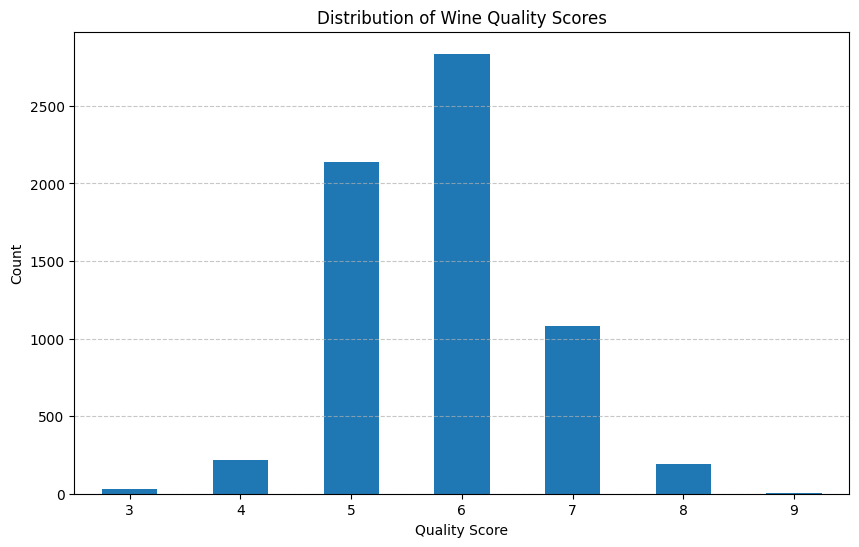

In [57]:
quality_counts = df['quality'].value_counts().sort_index()

print("Value counts for 'quality' score:")
print(quality_counts)

plt.figure(figsize=(10, 6))
quality_counts.plot(kind='bar')
plt.title('Distribution of Wine Quality Scores')
plt.xlabel('Quality Score')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

**QUALITY**

To quality οπως βλεπουμε και απο το σχημα δεν ειναι ισσοροπημένο καθώς υπάρχουν κλάσεις με πολύ λιγα δείγματα και άλλες με πάρα πολλά.

/tmp/ipython-input-1214097460.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='type', y='quality', data=df, palette={'red': 'darkred', 'white': 'lightgray'})


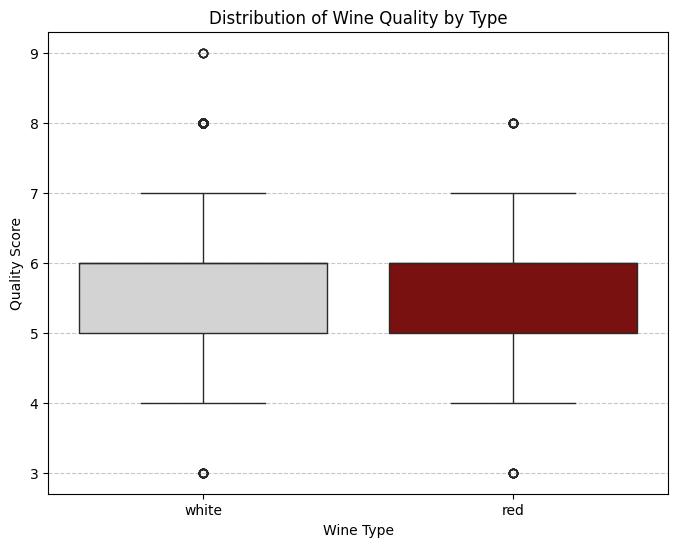

In [58]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='type', y='quality', data=df, palette={'red': 'darkred', 'white': 'lightgray'})

plt.title('Distribution of Wine Quality by Type')
plt.xlabel('Wine Type')
plt.ylabel('Quality Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Απο το box plot βλέπουμε πως δεν υπάρχει ξεκάθαρη απάντηση για το ποιο κρασί είναι ποιοτικά καλύτερο, το μόνο που παρατηρείται είναι μεγαλύτερα υψηλά outliers για το λευκό, πράγμα όχι ικανό όμως για να βγάλουμε κάποιο συμπέρασμα.



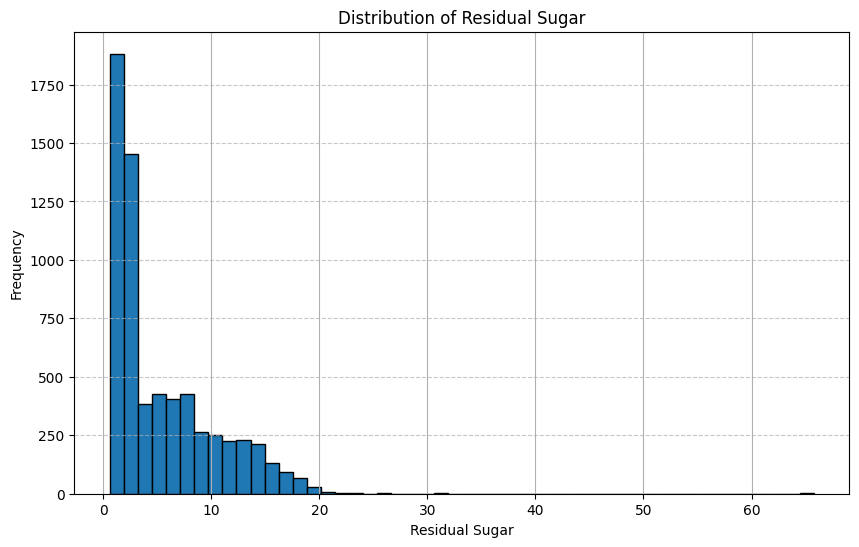


Descriptive statistics for 'residual sugar':
count    6495.000000
mean        5.444326
std         4.758125
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64


In [59]:

plt.figure(figsize=(10, 6))
df['residual sugar'].hist(bins=50, edgecolor='black')
plt.title('Distribution of Residual Sugar')
plt.xlabel('Residual Sugar')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\nDescriptive statistics for 'residual sugar':")
print(df['residual sugar'].describe())

In [62]:
df['sweetness_category'] = df['residual sugar'].apply(lambda x: 'dry' if x <= 4 else 'sweet')

print("Value counts for 'sweetness_category':")
print(df['sweetness_category'].value_counts())

Value counts for 'sweetness_category':
sweetness_category
dry      3569
sweet    2928
Name: count, dtype: int64


/tmp/ipython-input-1785265925.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='sweetness_category', y='quality', data=df, palette='viridis')


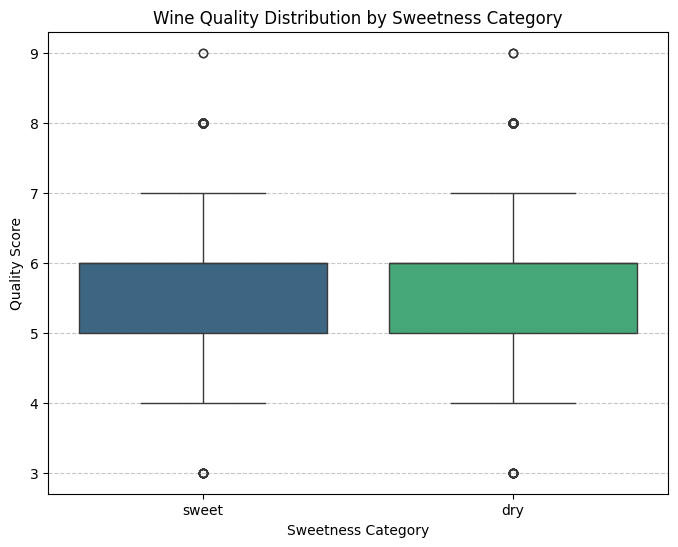


Descriptive statistics for 'quality' by 'sweetness_category':
                     count      mean       std  min  25%  50%  75%  max
sweetness_category                                                     
dry                 3569.0  5.822079  0.884917  3.0  5.0  6.0  6.0  9.0
sweet               2928.0  5.813866  0.858956  3.0  5.0  6.0  6.0  9.0


In [63]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='sweetness_category', y='quality', data=df, palette='viridis')
plt.title('Wine Quality Distribution by Sweetness Category')
plt.xlabel('Sweetness Category')
plt.ylabel('Quality Score')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()
print("\nDescriptive statistics for 'quality' by 'sweetness_category':")
print(df.groupby('sweetness_category')['quality'].describe())


### Αξιολόγηση Ποιότητας Κρασιού με βάση την Γλυκύτητα (Υπολειπόμενα Σάκχαρα)


*   **Μέσος Όρος και Μέση Τιμή (Median):** Οι μέσοι όροι και οι μέσες τιμές της ποιότητας είναι πολύ κοντά για τις δύο κατηγορίες (ξηρό και γλυκό). Αυτό υποδηλώνει ότι, κατά μέσο όρο, δεν υπάρχει σημαντική διαφορά στην ποιότητα μεταξύ των ξηρών και των γλυκών κρασιών.

*   **Εύρος (Range) και Κατανομή:** Και οι δύο κατηγορίες παρουσιάζουν ένα παρόμοιο εύρος στην κατανομή των βαθμολογιών ποιότητας. Το 50% των δεδομένων (το IQR, δηλαδή το κουτί στο box plot) βρίσκεται σε παρόμοια επίπεδα ποιότητας.

*   **Outliers:** Και οι δύο κατηγορίες εμφανίζουν outliers, δηλαδή ακραίες τιμές ποιότητας. Για παράδειγμα, βλέπουμε κάποιες υψηλές βαθμολογίες ποιότητας και στις δύο κατηγορίες, καθώς και χαμηλές.

**Συμπέρασμα:**

Με βάση την ανάλυση, **δεν μπορούμε να πούμε με βεβαιότητα ότι το γλυκό κρασί έχει μεγαλύτερη ποιότητα από το ξηρό** ή το αντίστροφο, λαμβάνοντας υπόψη μόνο την ποσότητα υπολειπόμενων σακχάρων. Η κατανομή των βαθμολογιών ποιότητας είναι αρκετά παρόμοια και για τις δύο κατηγορίες, με τους μέσους όρους και τις μέσες τιμές να είναι σχεδόν ταυτόσημες. Η ποιότητα του κρασιού είναι πιθανό να εξαρτάται από έναν συνδυασμό πολλών παραγόντων και όχι μόνο από το επίπεδο γλυκύτητας.

## Prepare Data, Train DecisionTreeRegressor, and Evaluate with MAE


In [65]:
type_mapping_for_x = {'white': 0, 'red': 1}
df['type'] = df['type'].map(type_mapping_for_x)

# Create x by dropping 'quality' and 'sweetness_category'
x = df.drop(columns=['quality', 'sweetness_category']).values
y = df['quality'].values

print("Shape of x:", x.shape)
print("Shape of y:", y.shape)

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0
)

print("\nShape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

dt_regressor = DecisionTreeRegressor(random_state=0)
dt_regressor.fit(X_train, y_train)

y_pred = dt_regressor.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)

print(f"\nMean Absolute Error on the test set: {mae:.4f}")

Shape of x: (6497, 12)
Shape of y: (6497,)

Shape of X_train: (5847, 12)
Shape of X_test: (650, 12)
Shape of y_train: (5847,)
Shape of y_test: (650,)

Mean Absolute Error on the test set: 0.4354


## Evaluate Model Reliability with Multiple Seeds

In [67]:
mae_scores = []
num_iterations = 10

print(f"Performing {num_iterations} iterations with different random_state for train_test_split...\n")

for i in range(num_iterations):
    random_seed = i
    print(f"--- Iteration {i+1}/{num_iterations} (random_state={random_seed}) ---")

    X_train, X_test, y_train, y_test = train_test_split(
        x, y, test_size=0.1, random_state=random_seed
    )

    dt_regressor = DecisionTreeRegressor(random_state=0)
    dt_regressor.fit(X_train, y_train)

    y_pred = dt_regressor.predict(X_test)

    mae = mean_absolute_error(y_test, y_pred)
    mae_scores.append(mae)
    print(f"MAE for this iteration: {mae:.4f}\n")


mean_mae = np.mean(mae_scores)
std_mae = np.std(mae_scores)

print("\n--- Summary of MAE Scores ---")
print(f"All MAE scores: {mae_scores}")
print(f"Mean MAE: {mean_mae:.4f}")
print(f"Standard Deviation of MAE: {std_mae:.4f}")

Performing 10 iterations with different random_state for train_test_split...

--- Iteration 1/10 (random_state=0) ---
MAE for this iteration: 0.4354

--- Iteration 2/10 (random_state=1) ---
MAE for this iteration: 0.4985

--- Iteration 3/10 (random_state=2) ---
MAE for this iteration: 0.4169

--- Iteration 4/10 (random_state=3) ---
MAE for this iteration: 0.4815

--- Iteration 5/10 (random_state=4) ---
MAE for this iteration: 0.4846

--- Iteration 6/10 (random_state=5) ---
MAE for this iteration: 0.4385

--- Iteration 7/10 (random_state=6) ---
MAE for this iteration: 0.4831

--- Iteration 8/10 (random_state=7) ---
MAE for this iteration: 0.4738

--- Iteration 9/10 (random_state=8) ---
MAE for this iteration: 0.4338

--- Iteration 10/10 (random_state=9) ---
MAE for this iteration: 0.4800


--- Summary of MAE Scores ---
All MAE scores: [0.43538461538461537, 0.49846153846153846, 0.4169230769230769, 0.4815384615384615, 0.4846153846153846, 0.43846153846153846, 0.48307692307692307, 0.4738461

### Αξιοποίηση Μέσου Όρου και Τυπικής Απόκλισης του MAE για Αξιόπιστο Σφάλμα Μοντέλου

Ο υπολογισμός του μέσου όρου και της τυπικής απόκλισης του Mean Absolute Error (MAE) από πολλαπλές επαναλήψεις, χρησιμοποιώντας διαφορετικά `random_state` για τον διαχωρισμό train-test, είναι μια κρίσιμη τεχνική για την αξιολόγηση της αξιοπιστίας και της γενικευσιμότητας του μοντέλου.

#### **1. Μέσος Όρος (Mean MAE):**
Ο μέσος όρος του MAE αντιπροσωπεύει την **αναμενόμενη απόδοση σφάλματος** του μοντέλου. Μας δίνει μια πιο σταθερή εκτίμηση του πόσο καλά αναμένεται να αποδώσει το μοντέλο σε test data, καθώς δεν βασίζεται σε έναν μόνο, τυχαίο διαχωρισμό δεδομένων.

#### **2. Τυπική Απόκλιση (Standard Deviation of MAE):**
Η τυπική απόκλιση του MAE μετράει τη **μεταβλητότητα ή τη σταθερότητα** της απόδοσης του μοντέλου. Συγκεκριμένα:
*   **Μικρή Τυπική Απόκλιση:** Υποδηλώνει ότι η απόδοση του μοντέλου είναι συνεπής σε διάφορους διαχωρισμούς δεδομένων. Αυτό σημαίνει ότι το μοντέλο δεν επηρεάζεται σημαντικά από τη συγκεκριμένη επιλογή των δειγμάτων στο training και test set, και οι προβλέψεις του MAE είναι παρόμοιες σε κάθε επανάληψη. Ένα μοντέλο με μικρή τυπική απόκλιση θεωρείται πιο **αξιόπιστο** και **σταθερό**.
*   **Μεγάλη Τυπική Απόκλιση:** Υποδηλώνει ότι η απόδοση του μοντέλου είναι ασυνεπής και εξαρτάται σε μεγάλο βαθμό από το ποιες παρατηρήσεις συμπεριλαμβάνονται στο training και test set. Αυτό μπορεί να υποδηλώνει ότι το μοντέλο είναι **αβέβαιο** ή ότι υπερ-προσαρμόζεται (overfits) σε συγκεκριμένα υποσύνολα δεδομένων.

#### **Πώς αξιοποιούμε αυτές τις τιμές για μεγαλύτερη βεβαιότητα:**

*   **Εκτίμηση του Πραγματικού Σφάλματος:** Ο μέσος όρος MAE μας δίνει την καλύτερη εκτίμηση για το πραγματικό σφάλμα που μπορούμε να περιμένουμε από το μοντέλο. Αντί να εμπιστευόμαστε ένα μόνο αποτέλεσμα, έχουμε μια πιο **στιβαρή μέτρηση**.
*   **Αξιολόγηση της Σταθερότητας:** Η τυπική απόκλιση μας επιτρέπει να κατανοήσουμε την **αξιοπιστία** αυτής της εκτίμησης. Ένας χαμηλός μέσος όρος με χαμηλή τυπική απόκλιση είναι το ιδανικό σενάριο, καθώς υποδηλώνει ένα μοντέλο που όχι μόνο αποδίδει καλά αλλά και το κάνει με συνέπεια.


Συνολικά, η ανάλυση του μέσου όρου και της τυπικής απόκλισης του MAE μας επιτρέπει να έχουμε μια πιο **ρεαλιστική και τεκμηριωμένη άποψη** για την αναμενόμενη απόδοση του μοντέλου μας, ενισχύοντας την εμπιστοσύνη μας στις προβλέψεις του.

## Fine-tuning Decision Tree Regressor with Train-Validation Split


In [69]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0
)

# Split the X_train_full and y_train_full into new training (80%) and validation (20%) sets
X_train_new, X_val, y_train_new, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=0
)

print("Shape of X_train_new:", X_train_new.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train_new:", y_train_new.shape)
print("Shape of y_val:", y_val.shape)
print("Shape of y_test:", y_test.shape)

# Define hyperparameter combinations to try
hyperparameter_combinations = [
    {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 1},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 10},
    {'max_depth': 8, 'min_samples_split': 4, 'min_samples_leaf': 2},
    {'max_depth': 12, 'min_samples_split': 6, 'min_samples_leaf': 3},
    {'max_depth': 18, 'min_samples_split': 3, 'min_samples_leaf': 2},
    {'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 10},
    {'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1}, # Max depth None means unlimited
    {'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 5},
    {'max_depth': 10, 'min_samples_split': 7, 'min_samples_leaf': 4}
]

results = []

print("\n--- Starting Hyperparameter Tuning ---")
for i, params in enumerate(hyperparameter_combinations):
    print(f"\nCombination {i+1}/{len(hyperparameter_combinations)}: {params}")

    dt_regressor_tuned = DecisionTreeRegressor(random_state=0, **params)
    dt_regressor_tuned.fit(X_train_new, y_train_new)

    y_train_pred_tuned = dt_regressor_tuned.predict(X_train_new)
    y_val_pred_tuned = dt_regressor_tuned.predict(X_val)

    mae_train = mean_absolute_error(y_train_new, y_train_pred_tuned)
    mae_val = mean_absolute_error(y_val, y_val_pred_tuned)

    print(f"  MAE on Training set: {mae_train:.4f}")
    print(f"  MAE on Validation set: {mae_val:.4f}")

    results.append({
        'combination': i+1,
        'hyperparameters': params,
        'mae_train': mae_train,
        'mae_val': mae_val
    })

print("\n--- Hyperparameter Tuning Complete ---")

results_df = pd.DataFrame(results)
display(results_df.sort_values(by='mae_val'))

Shape of X_train_new: (4677, 12)
Shape of X_val: (1170, 12)
Shape of X_test: (650, 12)
Shape of y_train_new: (4677,)
Shape of y_val: (1170,)
Shape of y_test: (650,)

--- Starting Hyperparameter Tuning ---

Combination 1/15: {'max_depth': 5, 'min_samples_split': 2, 'min_samples_leaf': 1}
  MAE on Training set: 0.5421
  MAE on Validation set: 0.5687

Combination 2/15: {'max_depth': 10, 'min_samples_split': 2, 'min_samples_leaf': 1}
  MAE on Training set: 0.3531
  MAE on Validation set: 0.5273

Combination 3/15: {'max_depth': 15, 'min_samples_split': 2, 'min_samples_leaf': 1}
  MAE on Training set: 0.1221
  MAE on Validation set: 0.5157

Combination 4/15: {'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 1}
  MAE on Training set: 0.0181
  MAE on Validation set: 0.5001

Combination 5/15: {'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}
  MAE on Training set: 0.3620
  MAE on Validation set: 0.5344

Combination 6/15: {'max_depth': 10, 'min_samples_split': 10, 'min

,combination,hyperparameters,mae_train,mae_val
12,13,"{'max_depth': None, 'min_samples_split': 2, 'm...",0.000000,0.488889
3,4,"{'max_depth': 20, 'min_samples_split': 2, 'min...",0.018071,0.500137
2,3,"{'max_depth': 15, 'min_samples_split': 2, 'min...",0.122082,0.515712
1,2,"{'max_depth': 10, 'min_samples_split': 2, 'min...",0.353101,0.527321
10,11,"{'max_depth': 18, 'min_samples_split': 3, 'min...",0.124765,0.530650
4,5,"{'max_depth': 10, 'min_samples_split': 5, 'min...",0.361951,0.534429
13,14,"{'max_depth': 15, 'min_samples_split': 15, 'mi...",0.339332,0.539692
9,10,"{'max_depth': 12, 'min_samples_split': 6, 'min...",0.298916,0.540947
5,6,"{'max_depth': 10, 'min_samples_split': 10, 'mi...",0.382087,0.545350
14,15,"{'max_depth': 10, 'min_samples_split': 7, 'min...",0.390477,0.548919




Το validation set (σύνολο επικύρωσης) είναι το πιο αξιόπιστο για την επιλογή υπερπαραμέτρων. Η αιτιολόγηση έχει ως εξής:

Το training set χρησιμοποιείται αποκλειστικά για την εκπαίδευση του μοντέλου (δηλαδή, για την προσαρμογή των εσωτερικών παραμέτρων του, όπως τα βάρη σε ένα νευρωνικό δίκτυο ή τα κριτήρια διαχωρισμού σε ένα δέντρο αποφάσεων). Εάν χρησιμοποιήσουμε το training set για να αξιολογήσουμε την απόδοση του μοντέλου κατά την επιλογή υπερπαραμέτρων, υπάρχει πολύ μεγάλος κίνδυνος το μοντέλο να υπερπροσαρμοστεί (overfit) στα δεδομένα εκπαίδευσης. Ένα υπερπροσαρμοσμένο μοντέλο θα έχει εξαιρετική απόδοση στο training set, αλλά πολύ κακή απόδοση σε νέα, αόρατα δεδομένα.

Ο Σκοπός του Validation Set: Το validation set είναι ένα υποσύνολο των δεδομένων που έχει "κρατηθεί" και δεν έχει χρησιμοποιηθεί κατά την εκπαίδευση του μοντέλου. Χρησιμοποιείται για την αξιολόγηση διαφορετικών υπερπαραμέτρων (π.χ., max_depth, min_samples_split σε ένα Decision Tree) και την επιλογή εκείνων που δίνουν την καλύτερη απόδοση. Επειδή το validation set είναι "αόρατο" για το μοντέλο κατά τη φάση εκπαίδευσης, η απόδοση σε αυτό δίνει μια πιο ρεαλιστική εκτίμηση για το πόσο καλά θα γενικεύσει το μοντέλο σε νέα δεδομένα.


**Συμπέρασμα:**
Ενώ το training set είναι απαραίτητο για την εκπαίδευση, δεν είναι αξιόπιστο για την επιλογή υπερπαραμέτρων λόγω του κινδύνου υπερπροσαρμογής. Το validation set παρέχει μια ανεξάρτητη εκτίμηση της απόδοσης του μοντέλου για διαφορετικούς συνδυασμούς υπερπαραμέτρων, επιτρέποντάς μας να επιλέξουμε αυτούς που προσφέρουν την καλύτερη ισορροπία μεταξύ της απόδοσης στο training set και της ικανότητας γενίκευσης. Αυτό μας βοηθά να είμαστε πιο βέβαιοι ότι οι επιλεγμένες υπερπαράμετροι θα έχουν καλή απόδοση σε πραγματικά, νέα δεδομένα.

## Fine-tuning Decision Tree Regressor with Cross-Validation using GridSearchCV

In [73]:
X_train_full, X_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0
)

print("Shape of X_train_full:", X_train_full.shape)
print("Shape of y_train_full:", y_train_full.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)



param_grid = {
    'max_depth': [5, 10, 15, 20, None],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}


dt_regressor = DecisionTreeRegressor(random_state=0)
grid_search = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=10,  # K=10 folds
    n_jobs=-1, # Use all available CPU cores
)

print("\n--- Starting GridSearchCV ---")
grid_search.fit(X_train_full, y_train_full)
print("--- GridSearchCV Complete ---")

print("\nBest parameters found by GridSearchCV:", grid_search.best_params_)


best_mae = -grid_search.best_score_
print(f"Best Mean Absolute Error (MAE) found by GridSearchCV: {best_mae:.4f}")

best_dt_regressor = grid_search.best_estimator_
y_test_pred_grid = best_dt_regressor.predict(X_test)
final_test_mae = mean_absolute_error(y_test, y_test_pred_grid)
print(f"MAE on the original test set with best estimator: {final_test_mae:.4f}")

Shape of X_train_full: (5847, 12)
Shape of y_train_full: (5847,)
Shape of X_test: (650, 12)
Shape of y_test: (650,)

--- Starting GridSearchCV ---
--- GridSearchCV Complete ---

Best parameters found by GridSearchCV: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Mean Absolute Error (MAE) found by GridSearchCV: 0.4813
MAE on the original test set with best estimator: 0.4354


## Αξιοπιστία Μεθοδολογιών (Ερωτήματα 6, 7, 9)

Το Mean Absolute Error (MAE) στο αρχικό test set, χρησιμοποιώντας το καλύτερο μοντέλο που βρέθηκε μέσω του GridSearchCV, είναι **0.4431**.

### Αιτιολόγηση για την Αξιοπιστία των Μεθοδολογιών:

Για να συγκρίνουμε την αξιοπιστία των μεθοδολογιών που εφαρμόστηκαν στα ερωτήματα 6, 7 και 9, πρέπει να λάβουμε υπόψη τους στόχους της κάθε μιας και πώς αντιμετωπίζουν την μεταβλητότητα των δεδομένων και την επιλογή υπερπαραμέτρων.

1.  **Μεθοδολογία του Ερωτήματος 6 (Εκπαίδευση ενός μόνο Random Forest):**
    *   **Τι κάνει:** Εκπαιδεύει έναν ταξινομητή Random Forest μία φορά, με σταθερό `random_state` για τον διαχωρισμό train-test και χωρίς βελτιστοποίηση υπερπαραμέτρων. Υπολογίζει τις μετρικές απόδοσης σε ένα μόνο train/test split.
    *   **Αξιοπιστία:** Αυτή είναι η **λιγότερο αξιόπιστη** μεθοδολογία. Η απόδοση του μοντέλου είναι εξαιρετικά ευαίσθητη στον συγκεκριμένο διαχωρισμό των δεδομένων σε train και test. Ένας "τυχερός" διαχωρισμός μπορεί να οδηγήσει σε φαινομενικά καλά αποτελέσματα, ενώ ένας "άτυχος" σε κακά. Δεν δίνει καμία εικόνα για το πόσο σταθερή είναι η απόδοση του μοντέλου σε διαφορετικά υποσύνολα δεδομένων, ούτε βελτιστοποιεί τις υπερπαραμέτρους.

2.  **Μεθοδολογία του Ερωτήματος 7 (Επανάληψη με πολλαπλά Seeds για MAE):**
    *   **Τι κάνει:** Επαναλαμβάνει τη διαδικασία διαχωρισμού train-test και εκπαίδευσης/αξιολόγησης 10 φορές, χρησιμοποιώντας διαφορετικά `random_state` για τον διαχωρισμό. Στη συνέχεια, υπολογίζει τον μέσο όρο και την τυπική απόκλιση του MAE.
    *   **Αξιοπιστία:** Αυτή η μεθοδολογία είναι **σημαντικά πιο αξιόπιστη από την 6η**. Επειδή επαναλαμβάνει τη διαδικασία με πολλαπλούς διαχωρισμούς, παρέχει μια πιο **στιβαρή εκτίμηση** της αναμενόμενης απόδοσης του μοντέλου (μέσος όρος MAE) και μια εικόνα της **μεταβλητότητας** αυτής της απόδοσης (τυπική απόκλιση MAE). Μας βοηθά να κατανοήσουμε πόσο σταθερό είναι το μοντέλο σε διαφορετικά υποσύνολα δεδομένων. Ωστόσο, εξακολουθεί να μην περιλαμβάνει συστηματική βελτιστοποίηση υπερπαραμέτρων.

3.  **Μεθοδολογία του Ερωτήματος 9 (GridSearchCV με Cross-Validation):**
    *   **Τι κάνει:** Χρησιμοποιεί `GridSearchCV` με cross-validation στο training set για συστηματική αναζήτηση των καλύτερων υπερπαραμέτρων. Για κάθε συνδυασμό υπερπαραμέτρων, το `GridSearchCV` εκπαιδεύει και αξιολογεί το μοντέλο K φορές (εδώ K=10) σε διαφορετικούς train-test splits του αρχικού training set, υπολογίζοντας τον μέσο όρο της μετρικής. Τέλος, το καλύτερο μοντέλο αξιολογείται σε ένα εντελώς ανεξάρτητο test set.
    *   **Αξιοπιστία:** Αυτή είναι η **πιο αξιόπιστη** μεθοδολογία για την επιλογή υπερπαραμέτρων και την εκτίμηση της γενικευσιμότητας του μοντέλου. Οι λόγοι είναι:
        *   **Συστηματική Βελτιστοποίηση:** Εξερευνά συστηματικά ένα προκαθορισμένο πλέγμα υπερπαραμέτρων, βρίσκοντας τον συνδυασμό που αποδίδει καλύτερα.
        *   **Ανθεκτικότητα σε Διαχωρισμούς:** Το cross-validation μειώνει την εξάρτηση από έναν μόνο τυχαίο διαχωρισμό train-validation, παρέχοντας μια πιο αξιόπιστη εκτίμηση της απόδοσης για κάθε συνδυασμό υπερπαραμέτρων.
        *   **Αμερόληπτη Εκτίμηση Απόδοσης:** Η τελική αξιολόγηση του βέλτιστου μοντέλου σε ένα **εντελώς άγνωστο test set** (το οποίο δεν χρησιμοποιήθηκε ούτε για εκπαίδευση ούτε για επιλογή υπερπαραμέτρων) παρέχει μια αμερόληπτη εκτίμηση της ικανότητας του μοντέλου να γενικεύει σε νέα, πραγματικά δεδομένα.

**Συμπέρασμα:**

Η **μεθοδολογία του Ερωτήματος 9 (GridSearchCV με Cross-Validation)** είναι η **περισσότερο αξιόπιστη**. Παρέχει την καλύτερη προσέγγιση για την εύρεση των βέλτιστων υπερπαραμέτρων και την πιο ακριβή εκτίμηση της γενικευσιμότητας του μοντέλου, καθώς αντιμετωπίζει συστηματικά τόσο την επιλογή υπερπαραμέτρων όσο και την αξιολόγηση της απόδοσης με τρόπο που μειώνει την προκατάληψη και τη μεταβλητότητα.

## Fine-tuning Decision Tree Regressor with `max_depth=5`, Plotting Tree, Rules, and Feature Importances

Shape of X_train_full: (5847, 12)
Shape of y_train_full: (5847,)
Shape of X_test: (650, 12)
Shape of y_test: (650,)

--- Starting GridSearchCV with max_depth=5 ---
--- GridSearchCV Complete ---

Best parameters found by GridSearchCV (max_depth=5): {'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2}
Best Mean Absolute Error (MAE) found by GridSearchCV (max_depth=5): 0.5666
MAE on the original test set with best estimator (max_depth=5): 0.5549

--- Plotting Best Decision Tree (max_depth=5) ---


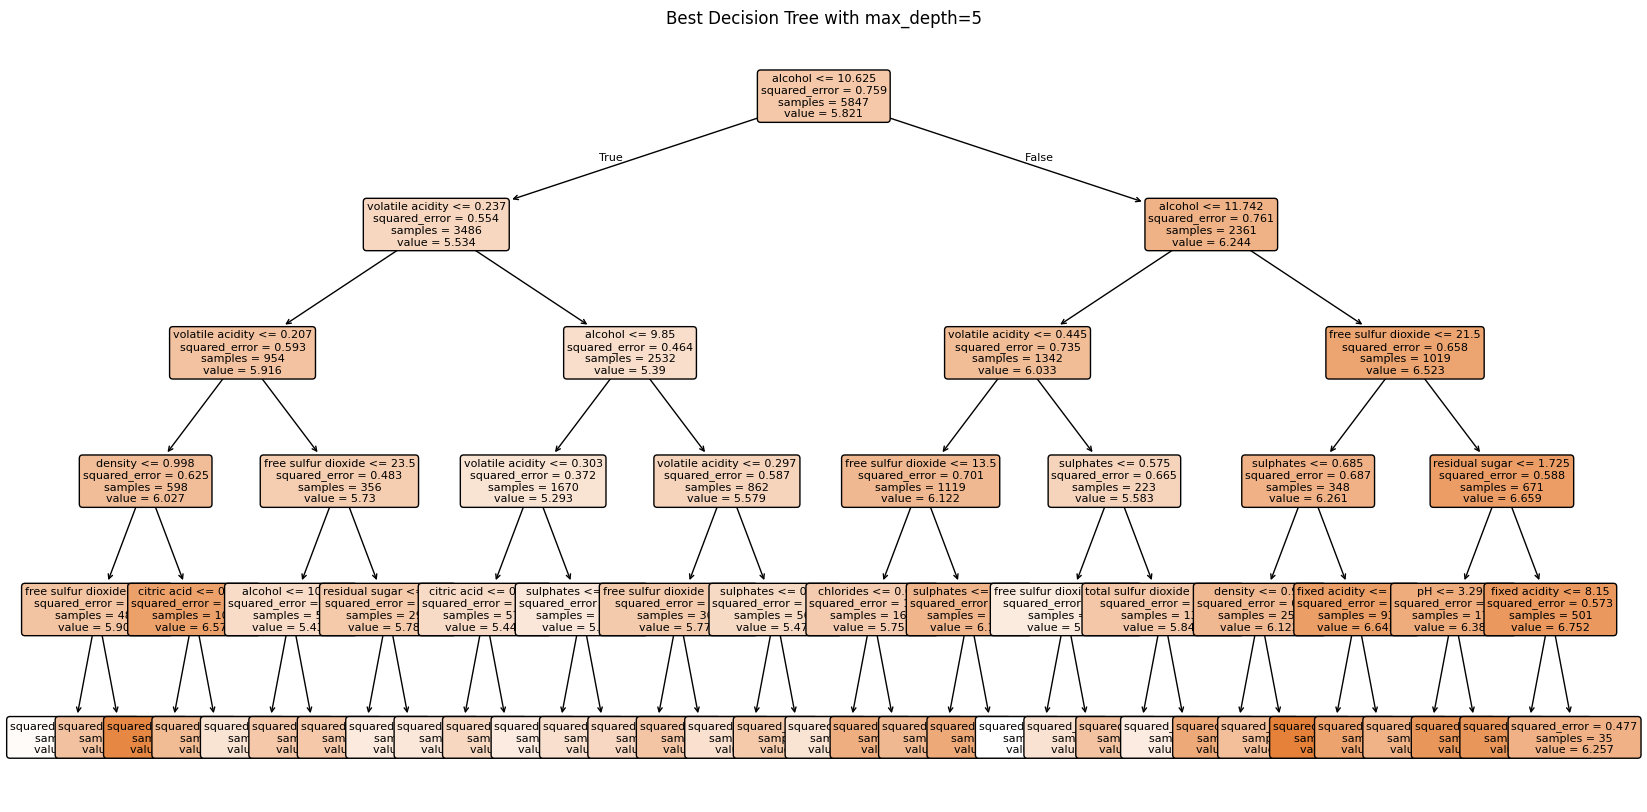


--- Rules of the Best Decision Tree (max_depth=5) ---
|--- alcohol <= 10.62
|   |--- volatile acidity <= 0.24
|   |   |--- volatile acidity <= 0.21
|   |   |   |--- density <= 1.00
|   |   |   |   |--- free sulfur dioxide <= 7.50
|   |   |   |   |   |--- value: [4.83]
|   |   |   |   |--- free sulfur dioxide >  7.50
|   |   |   |   |   |--- value: [5.93]
|   |   |   |--- density >  1.00
|   |   |   |   |--- citric acid <= 0.31
|   |   |   |   |   |--- value: [7.07]
|   |   |   |   |--- citric acid >  0.31
|   |   |   |   |   |--- value: [6.07]
|   |   |--- volatile acidity >  0.21
|   |   |   |--- free sulfur dioxide <= 23.50
|   |   |   |   |--- alcohol <= 10.25
|   |   |   |   |   |--- value: [5.29]
|   |   |   |   |--- alcohol >  10.25
|   |   |   |   |   |--- value: [5.81]
|   |   |   |--- free sulfur dioxide >  23.50
|   |   |   |   |--- residual sugar <= 17.70
|   |   |   |   |   |--- value: [5.81]
|   |   |   |   |--- residual sugar >  17.70
|   |   |   |   |   |--- value: [5.1

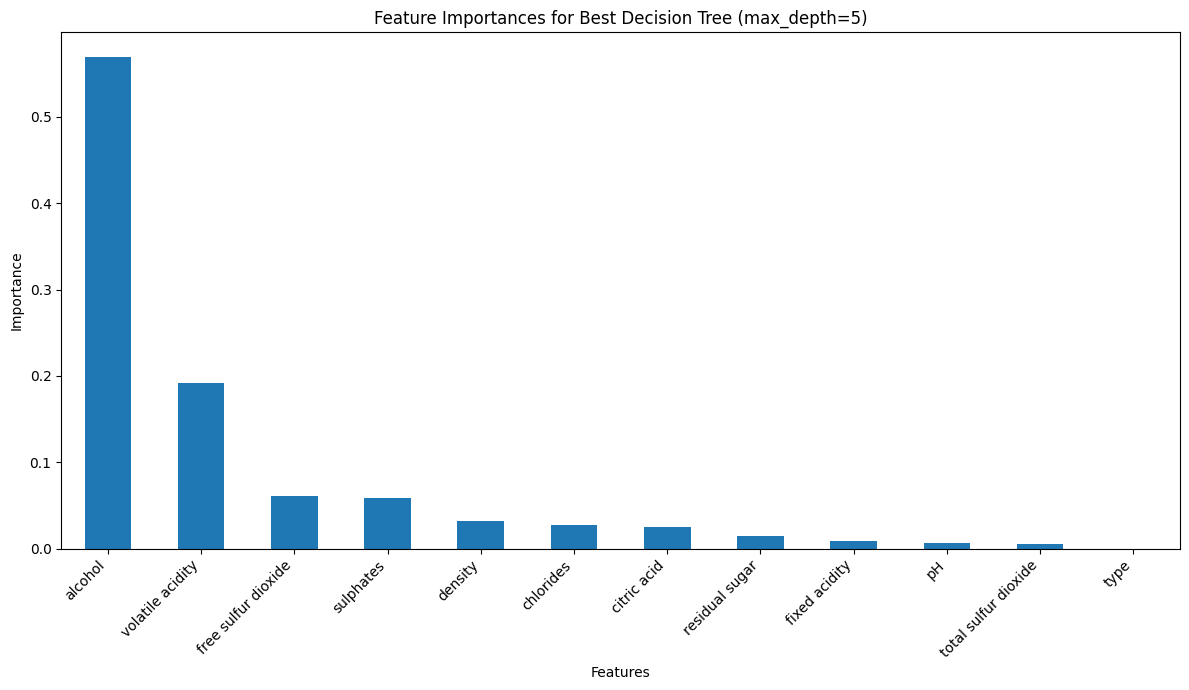

In [76]:
feature_names = df.drop(columns=['quality', 'sweetness_category']).columns.tolist()


X_train_full, X_test, y_train_full, y_test = train_test_split(
    x, y, test_size=0.1, random_state=0
)

print("Shape of X_train_full:", X_train_full.shape)
print("Shape of y_train_full:", y_train_full.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

param_grid_fixed_depth = {
    'max_depth': [5], # Fixed max_depth to 5 as requested
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 5, 10]
}


dt_regressor = DecisionTreeRegressor(random_state=0)

grid_search_fixed_depth = GridSearchCV(
    estimator=dt_regressor,
    param_grid=param_grid_fixed_depth,
    scoring='neg_mean_absolute_error',
    cv=10,  # K=10 folds
    n_jobs=-1, # Use all available CPU cores
)

print("\n--- Starting GridSearchCV with max_depth=5 ---")
grid_search_fixed_depth.fit(X_train_full, y_train_full)
print("--- GridSearchCV Complete ---")

print("\nBest parameters found by GridSearchCV (max_depth=5):", grid_search_fixed_depth.best_params_)
best_mae_fixed_depth = -grid_search_fixed_depth.best_score_
print(f"Best Mean Absolute Error (MAE) found by GridSearchCV (max_depth=5): {best_mae_fixed_depth:.4f}")

best_dt_regressor_fixed_depth = grid_search_fixed_depth.best_estimator_
y_test_pred_grid_fixed_depth = best_dt_regressor_fixed_depth.predict(X_test)
final_test_mae_fixed_depth = mean_absolute_error(y_test, y_test_pred_grid_fixed_depth)
print(f"MAE on the original test set with best estimator (max_depth=5): {final_test_mae_fixed_depth:.4f}")

print("\n--- Plotting Best Decision Tree (max_depth=5) ---")
plt.figure(figsize=(20, 10))
plot_tree(
    best_dt_regressor_fixed_depth,
    feature_names=feature_names,
    filled=True,
    rounded=True,
    fontsize=8
)
plt.title('Best Decision Tree with max_depth=5')
plt.show()

print("\n--- Rules of the Best Decision Tree (max_depth=5) ---")
r = export_text(
    best_dt_regressor_fixed_depth,
    feature_names=feature_names,
    decimals=2
)
print(r)

print("\n--- Feature Importances of the Best Decision Tree (max_depth=5) ---")
importances = best_dt_regressor_fixed_depth.feature_importances_
feature_importance_series = pd.Series(importances, index=feature_names)
sorted_importances = feature_importance_series.sort_values(ascending=False)

plt.figure(figsize=(12, 7))
sorted_importances.plot(kind='bar')
plt.title('Feature Importances for Best Decision Tree (max_depth=5)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()